# Pymaceuticals Inc.
---


## Reading/Cleaning the Data
 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results

combined_data=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
combined_data.head()

organized_combined_data=merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
organized_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [154]:
# Checking the number of mice.
unique_mice=organized_merged_data['Mouse ID'].unique()
not_unique_mice=len(unique_mice)
print(f"There are {not_unique_mice} unique mice.")

There are 249 unique mice.


In [155]:
#drop duplicated Mouse ID + Timepoint entries
organized_combined_data.duplicated()
no_duplicates=organized_combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
len(no_duplicates['Mouse ID'].unique())
no_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [156]:
print(len(no_duplicates['Mouse ID'].unique()))

249


## Summary Statistics

In [173]:
list_drugs=no_duplicates['Drug Regimen'].tolist()
list_drugs

#mean of tumor volume by Drug Regimen
index_tum_drug=no_duplicates.set_index('Drug Regimen')['Tumor Volume (mm3)']
tum_drug_grouped=index_tum_drug.groupby('Drug Regimen')
tum_drug_grouped.mean()

#median of tumor volume by Drug Regimen
median_tum_drug=tum_drug_grouped.median()
median_tum_drug
#Variance of tumor volume by Drug Regimen
var_tum_drug=tum_drug_grouped.var()
var_tum_drug
#Standard Deviation of tumor volume by Drug Regimen
std_tum_drug=tum_drug_grouped.std()
std_tum_drug
#sem by drug
sem_tum_drug=tum_drug_grouped.sem()
sem_tum_drug

#create a summary DataFrame
summary_df=pd.DataFrame({
    "Mean Tumor Volume": tum_drug_grouped.mean(),
    "Median Tumor Volume": median_tum_drug,
    "Variance Tumor Volume": var_tum_drug,
    "Standard Deviation Total Volume": std_tum_drug,
    "Standard Error of the Mean Total Volume": sem_tum_drug
})

summary_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Total Volume,Standard Error of the Mean Total Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
#Calculate summary statistics using agg function
agg_sum_df=tum_drug_grouped.agg(['mean','median','var','std','sem'])
agg_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

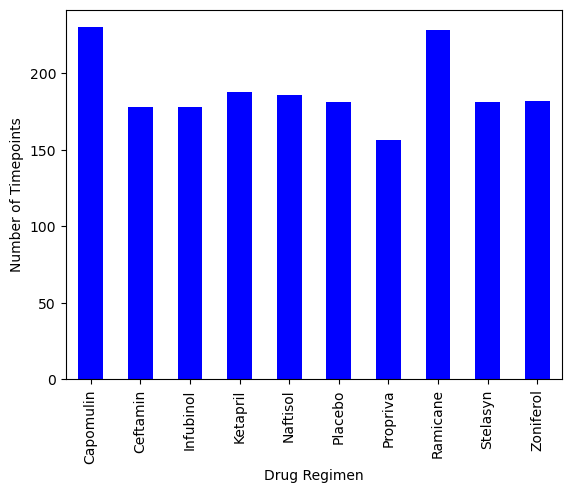

In [182]:
#Chart the number of timepoints for each Drug Regimen using Pandas Plot
drug_tp=no_duplicates.groupby('Drug Regimen')
drug_tp

timepoint_count=drug_tp['Timepoint'].count()
timepoint_count

drug_tp_chart=timepoint_count.plot(kind='bar',color='b')
drug_tp_chart

drug_tp_chart.set_xlabel("Drug Regimen")
drug_tp_chart.set_ylabel("Number of Timepoints")


plt.show()

Text(0, 0.5, 'Number of Timepoints')

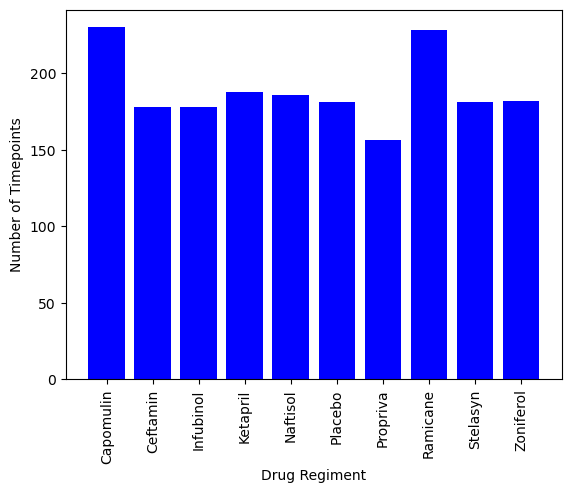

In [181]:
# Chart the number of timepoints for each Drug Regimen using pyplot
sorted=no_duplicates['Drug Regimen']
sorted_alpha=sorted.sort_values()
sorted_alpha_unique=sorted_alpha.unique()
sorted_alpha_unique

x_axis=sorted_alpha_unique
y_axis=timepoint_count

plt.bar(x_axis,y_axis,color='b')
plt.xticks(rotation=90)

plt.xlabel("Drug Regiment")
plt.ylabel("Number of Timepoints")

930
958


Text(0, 0.5, 'Sex')

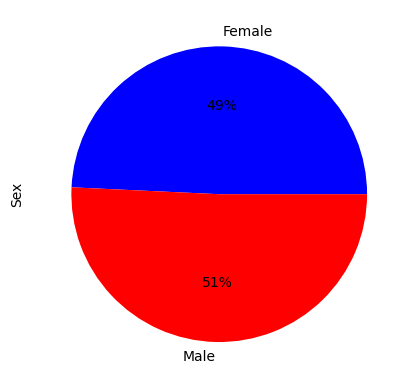

In [184]:
male_mice=no_duplicates.loc[no_duplicates['Sex']=='Male']
len(male_mice)

female_mice=no_duplicates.loc[no_duplicates['Sex']=='Female']
len(female_mice)


#plot distribution of male and female mice using pyplot
print (len(female_mice))
print (len(male_mice))

sexes=['Female','Male']
counts=[len(female_mice),len(male_mice)]
colors=["blue","red"]

plt.pie(counts,labels=sexes,colors=colors,autopct="%1.0f%%")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

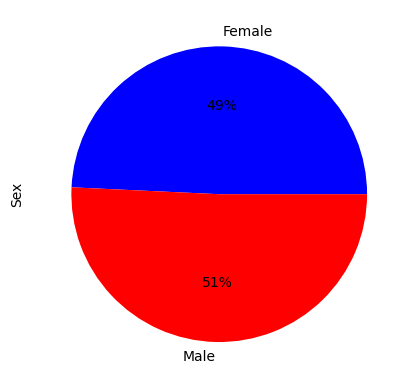

In [185]:
#plot distribution of male and female mice using pandas plot
grouped_sex=no_duplicates.groupby('Sex')
grouped_sex

grouped_sex_count=grouped_sex['Mouse ID'].count()
grouped_sex_count

grouped_sex_count_chart=grouped_sex_count.plot(kind='pie',autopct="%1.0f%%",colors=['blue','red'])
grouped_sex_count_chart

grouped_sex_count_chart.set_ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_group=no_duplicates.groupby(['Mouse ID'])
timepoint_MouseID_max=time_group['Timepoint'].max()
pd.DataFrame(timepoint_MouseID_max)
timepoint_MouseID_max


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [187]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
including_maxtp=pd.merge(no_duplicates, max_timepoint_byMouseID, how="right", on=["Mouse ID","Timepoint"])
including_maxtp

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_regimens:
# Locate the rows which contain mice on each drug and get the tumor volumes
    mice_each_drug_tum=including_maxtp.loc[including_maxtp['Drug Regimen']==drug,'Tumor Volume (mm3)']

    tumor_vol.append(mice_each_drug_tum)
    
    
# Determine outliers using upper and lower bounds
    quartiles =mice_each_drug_tum.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume  is: {lowerq}")
    print(f"The upper quartile of Tumor Volume  is: {upperq}")
    print(f"The interquartile range of Tumor Volume  is: {iqr}")
    print(f"The the median of Tumor Volume  is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")   

The lower quartile of Tumor Volume  is: 32.37735684
The upper quartile of Tumor Volume  is: 40.1592203
The interquartile range of Tumor Volume  is: 7.781863460000004
The the median of Tumor Volume  is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume  is: 31.56046955
The upper quartile of Tumor Volume  is: 40.65900627
The interquartile range of Tumor Volume  is: 9.098536719999998
The the median of Tumor Volume  is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume  is: 54.04860769
The upper quartile of Tumor Volume  is: 65.52574285
The interquartile range of Tumor Volume  is: 11.477135160000003
The the median of Tumor Volume  is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Tumor Volume  is: 48.72207785
The upper qu

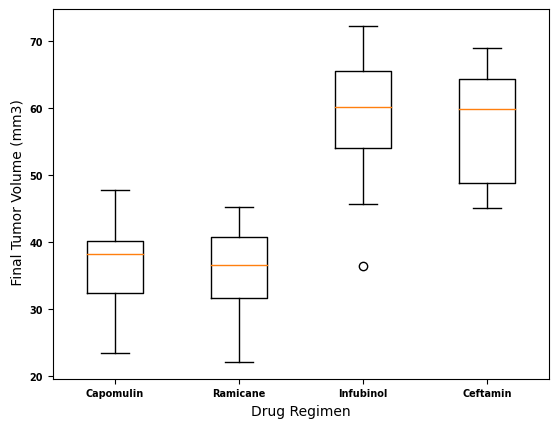

In [191]:
#box plot representing four different drug regimens
fig1, ax1 = plt.subplots()
ax1.set_ylabel(' Final Tumor Volume (mm3)',fontsize=10)
ax1.set_xlabel('Drug Regimen',fontsize=10)
ax1.boxplot(tumor_vol)
ax1.set_xticklabels(drug_regimens)
plt.xticks(fontsize=7, fontweight='bold')
plt.yticks(fontsize=7, fontweight='bold')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Timepoint (Days)')

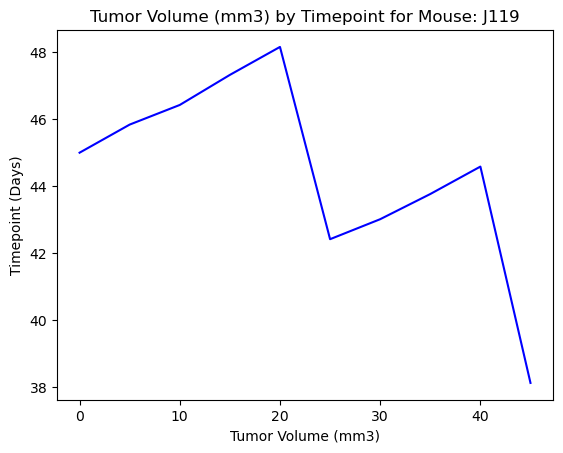

In [192]:
#1. Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
#lets show our total dataset again
no_duplicates

#generate a dataset of all unique mice treated by Capomulin
no_duplicates['Mouse ID'].unique()
capomulin_mice=no_duplicates.loc[no_duplicates['Drug Regimen']=='Capomulin']
list_capomulin_mice=capomulin_mice['Mouse ID'].unique()
list_capomulin_mice
#Choose one mouse from the list of Capomulin treated mice. Let's choose j119

chosen_mouse=capomulin_mice.loc[capomulin_mice['Mouse ID']=='j119']
chosen_mouse

#Obtain the columns we need for our line plot (tumor volume & time point)
j119_tum_vol=chosen_mouse['Tumor Volume (mm3)']
j119_tum_vol

j119_time_point=chosen_mouse['Timepoint']
j119_time_point

j119_line_plot=plt.plot(j119_time_point,j119_tum_vol,color='blue')
plt.title('Tumor Volume (mm3) by Timepoint for Mouse: J119')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint (Days)')

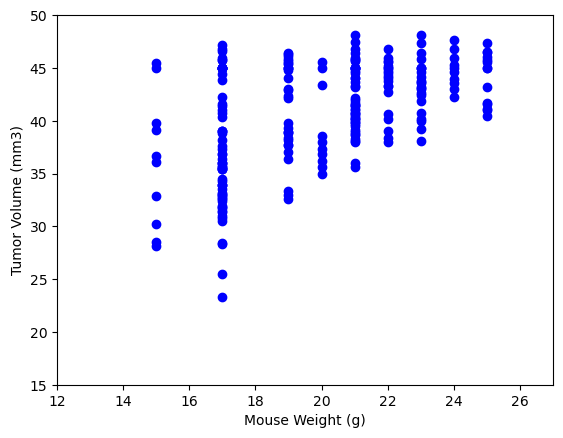

In [194]:
#2. Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
#define what to use as axis.
capomulin_mice=no_duplicates.loc[no_duplicates['Drug Regimen']=='Capomulin']
capomulin_mice
tum_vol_cap=capomulin_mice['Tumor Volume (mm3)']
tum_vol_cap

mouse_weight_cap=capomulin_mice['Weight (g)']
mouse_weight_cap

plt.scatter(mouse_weight_cap,tum_vol_cap, marker="o", facecolors='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(12,27)
plt.ylim(15,50)
plt.show()



## Correlation and Regression

In [195]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor
#volume for the Capomulin treatment. #perform a groupby by mouse and then take average tumor volume.
capomulin_mice

#create our list for average tumor volume for mice treated by Capomulin
grouped_cap_mice_avgtumvol=capomulin_mice.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
grouped_cap_mice_avgtumvol
avg_tum_vol_by_mouse_list=grouped_cap_mice_avgtumvol.tolist()
avg_tum_vol_by_mouse_list
# obtain mouse weight for mice treated by Capomulin
grouped_cap_mice_weight=capomulin_mice.groupby(['Mouse ID']).mean()['Weight (g)']
grouped_cap_mice_weight 

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

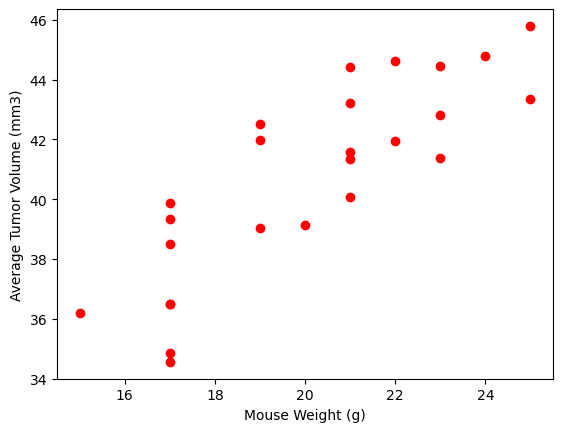

In [201]:
plt.scatter(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list, marker="o", facecolors='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

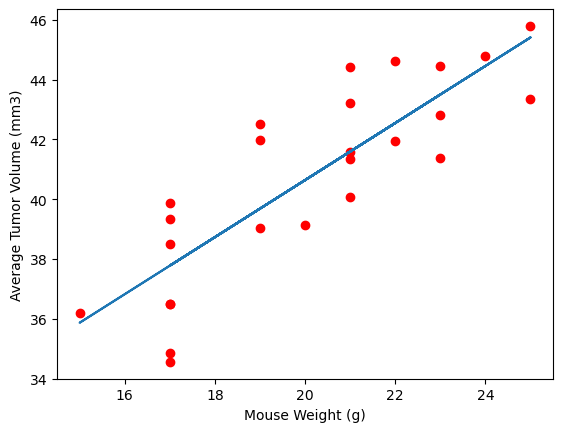

In [200]:
#Calculate the linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list)
vc_fit = vc_slope * grouped_cap_mice_weight + vc_int

#Plot the linear regression model on top of the previous scatter plot.
plt.scatter(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list, marker="o", facecolors='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(grouped_cap_mice_weight,vc_fit,"-")
plt.show()

In [202]:
# Calculate the correlation coefficient between Mouse weight and Average Tumor Volume
correlation2=st.pearsonr(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list)
print(f"The correlation coefficient between Mouse weight and Average Tumor Volume is {round(correlation2[0],3)}")

The correlation coefficient between Mouse weight and Average Tumor Volume is 0.842


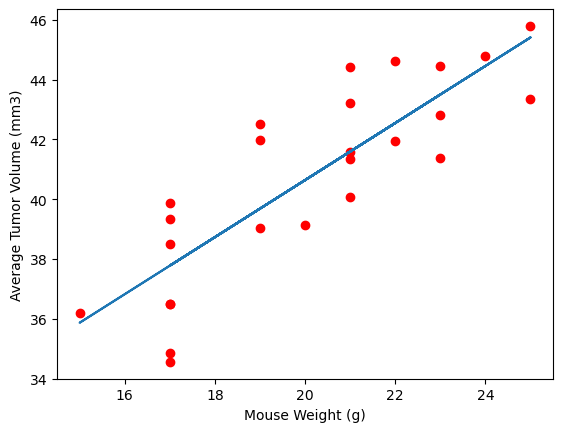

In [204]:
#Calculate the linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list)
vc_fit = vc_slope * grouped_cap_mice_weight + vc_int

#Plot the linear regression model on top of the previous scatter plot.
plt.scatter(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list, marker="o", facecolors='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(grouped_cap_mice_weight,vc_fit,"-")
plt.show()